In [2]:
#importing packages
import pandas as pd
import numpy as np 
import networkit as nk 
import networkx as nx
from cdlib import algorithms
from tqdm import tqdm
import pickle
from collections import Counter 

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'wurlitzer', 'infomap', 'karateclub'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw', 'karateclub'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [4]:
#importing data 
edges = pd.read_csv('edges.csv')
edges = edges.drop_duplicates()

#Dont need them to create graph 
# export = pd.read_csv('export.csv')
# nodes = pd.read_csv('nodes.csv')


In [ ]:
#Tasks Completed
"""
1. A directed graph network using Networkit Graph or any other large scale graph open source framework - Complete
2. Weight for each node using Page Rank algorithm [Page Rank] - Complete 
3. Community detection for all possible partitions with ability to extract insignificant partitions (e..g lesser than certain community size threshold)
6- Degree distribution - Complete
4. X,Y coordinated for each node in the graph using "Fruchterman Reingold" or any other suitable algorithm (due time complexity circular plot ) - complete 
7 Ability to assign color code for each node belonging to a certain partition (community) - complete 
5- Influencer nodes in each community, above certain threshold
8- Cliques in the whole graph
10- The source code in Jupyter notebook for all the above deliverables
"""

In [3]:
#Task
''' 
We have a big dataset of twitter data legitimately obtained for research purposes from Twitter API. The data consists of 3.5m nodes and 10m edges.
Data will be provided as CSV. The applicant is required to provide the following :
'''

' \nWe have a big dataset of twitter data legitimately obtained for research purposes from Twitter API. The data consists of 3.5m nodes and 10m edges.\nData will be provided as CSV. The applicant is required to provide the following :\n1. A directed graph network using Networkit Graph or any other large scale graph open source framework\n2. Weight for each node using Page Rank algorithm [Page Rank]\n3. Community detection for all possible partitions with ability to extract insignificant partitions (e..g lesser than certain community size threshold)\n4. X,Y coordinated for each node in the graph using "Fruchterman Reingold" or any other suitable algorithm\n5- Influencer nodes in each community, above certain threshold\n6- Degree distribution \n7 Ability to assign color code for each node belonging to a certain partition (community)\n8- Cliques in the whole graph\n10- The source code in Jupyter notebook for all the above deliverables\n\n'

# Creating Directional Graph - 1

* Initiate Graph Object 
* Create edges/nodes in graph Node

In [3]:
#Creating Graph Object 
# G = nk.Graph(weighted=False, directed=True, edgesIndexed=False)
# G = nx.DiGraph()

#or import the created graph 
# import pickle 
G = pickle.load(open('graph.pickle','rb'))


#for testing purposes
# G = nx.watts_strogatz_graph(30000,10,.2)

In [5]:
#Creating Network 
for i,r in tqdm(edges.iterrows()):
    source_node = r['Source']
    target_node = r['Target']
    G.add_edge(source_node,target_node)

#or we can use the more concise method: 
#G =  nx.from_pandas_edgelist(edges,source = 'Source',target = 'Target', edge_attr = True, create_using = nx.DiGraph())

10617726it [19:53, 8899.86it/s] 


# Calculate Page Rank for all Nodes - 2

In [34]:
alpha = .85 
pageRank_values = nx.pagerank(G,alpha =alpha)
pagerank_df = pd.DataFrame.from_dict(pageRank_values,orient ="index").reset_index()
pagerank_df.columns = ['Node','PageRank']
pagerank_df.to_csv('page_rank.csv',index = False)

# Community Detection - 3
- Louvain Community Detection 

In [18]:
#Detecting Communities 
comms = nx.community.louvain_communities(G)
#structure [{node1,node2},{node3,node3}] where every set is a community 

In [45]:
#Creating a dataframe that lists every node, and their community
comm_list = dict()
for i,comm in enumerate(comms):
    for node in comm:
        comm_list[node] = [i]


In [7]:
comms_df = pd.DataFrame(comm_list).T
comms_df = comms_df.reset_index()
comms_df.columns = ['Node','Community']
# comms_df.to_csv("communities.csv",index = False)

In [19]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

set_node_community(G, comms)

# Set Color based off community

In [20]:
def get_color(i,number_of_colors = 14,  r_off=1, g_off=1, b_off=1):
    '''Assign a color to a node.'''
    r0, g0, b0 = 0, 0, 0
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % number_of_colors) / (number_of_colors - 1)
    g = low + span * (((i + g_off) * 5) % number_of_colors) / (number_of_colors - 1)
    b = low + span * (((i + b_off) * 7) % number_of_colors) / (number_of_colors - 1)
    return (r, g, b)
#node color list to use when plotting 
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

In [133]:
#Storing Node Colors in csv 
node_color_dict = {v:get_color(G.nodes[v]['community']) for v in G.nodes}
node_color_df = pd.DataFrame(node_color_dict).T
node_color_df = node_color_df.reset_index()
node_color_df.columns = ['Node','R','G','B']
# node_color_df.to_csv('node_colors.csv',index = False)

# X,Y coordinates for each node in the graph using "Fruchterman Reingold" - 4

- Due to a N^3 runtime of the Fruchterman Reingold algorithm or Springlayout, a simple circular layout was chosen. 

In [106]:
position = nx.circular_layout(G)
position_df = pd.DataFrame(position).T
position_df = position_df.reset_index()
position_df.columns = ['Node','x','y']
position_df.to_csv('node_xy_positions.csv',index = False)

# Degree Distribution - 6

In [26]:
#Extracting node, and degree from Graph into DataFrame
node_degrees = {n:d for n,d in G.degree()}
node_degrees_df = pd.DataFrame.from_dict(node_degrees,orient='index').reset_index()
node_degrees_df.columns = ['Node','Degrees']
node_degrees_df.to_csv('node_degrees.csv',index = False)

Text(0.5, 1.0, 'Degree plot of network')

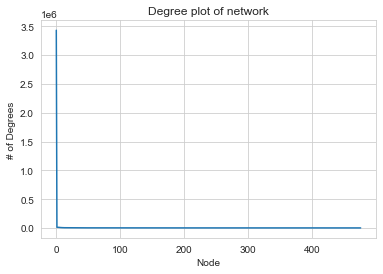

In [83]:
#visualizing 
degree_counts = pd.DataFrame.from_dict(dict(Counter(node_degrees_df['Degrees'])),orient='index').reset_index()
degree_counts.columns = ['degree','count']
degree_counts.sort_values(by =['degree'],ascending=False,inplace=True)
degree_counts['degree'].drop_duplicates().reset_index()['degree'].plot()
plt.xlabel('Node')
plt.ylabel('# of Degrees')
plt.title("Degree plot of network")

<AxesSubplot:>

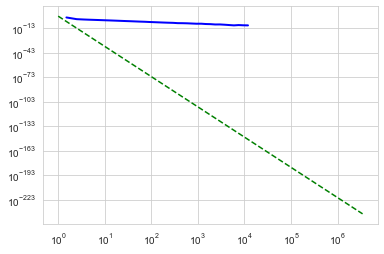

In [90]:
import powerlaw
pfit = powerlaw.Fit(node_degrees_df['Degrees'].tolist(),xmin = 1)
fig2 = pfit.plot_pdf(color='b', linewidth=2)
pfit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)
"""
Green: Ideal Power Law 
Blue: Twitter Data fit 
"""

# Influencer for each community 
- Betweeness centrality - Too slow 
- Eigenvector centrality - Too compuatational difficult
- In degree centrality 
- PageRank 
- Using both Indegree centrality and page rank to capture the top nodes. 

In [42]:
#Calculating indegree & merging with the community labeled dataframe
in_degree_dict = nx.in_degree_centrality(G)
in_degree_df = pd.DataFrame.from_dict(in_degree_dict, orient='index')
in_degree_df = in_degree_df.reset_index()
in_degree_df.columns = ['Node','in_degree']
# comms_df = pd.read_csv('Stats/communities.csv') if the communities cell hasnt been run, use the csv file
in_degree_df = in_degree_df.merge(comms_df, how = 'left', on = 'Node')
influencer_measures = in_degree_df.merge(pagerank_df,how = 'left', on = 'Node')

In [43]:
#Getting top 1% of each community based on the in degree
communities = influencer_measures['Community'].unique()
influencer_measures['degree_influencer']  = 0
influencer_measures['pagerank_influencer']  = 0
for community in communities: 
    #degree based influencers
    temp_df = influencer_measures[influencer_measures['Community']==community] 
    temp_df = temp_df.sort_values(by = ['in_degree'], ascending = False)

    top_pct = .01
    top_nodes = int(len(temp_df)*top_pct)

    #slicing influencers
    temp_df_degree = temp_df.iloc[:top_nodes]
    influencer_list = temp_df_degree['Node'].tolist()
    influencer_measures.loc[influencer_measures['Node'].isin(influencer_list),'degree_influencer'] = 1
    #pagerank based influencers
    temp_df = temp_df.sort_values(by = ['PageRank'], ascending = False)
    temp_df_pagerank = temp_df.iloc[:top_nodes]
    influencer_list = temp_df_pagerank['Node'].tolist()
    influencer_measures.loc[influencer_measures['Node'].isin(influencer_list),'pagerank_influencer'] = 1
    influencer_measures['influencer'] = influencer_measures[['degree_influencer','pagerank_influencer']].sum(axis = 1)

In [51]:
influencer_measures = influencer_measures[(influencer_measures['influencer']>0)]
influencer_measures.to_csv('Stats/influencer_nodes.csv',index = False)
#influencers


# Getting Cliques - Limited to influencer cliques, as the algorithm is NP complete.

In [14]:
influencer_list = set(influencers['Node'].tolist())
influencer_graph = nx.Graph()
influencer_edges = edges[(edges['Source'].isin(influencer_list))& (edges['Target'].isin(influencer_list))]
#inserting influencer nodes to influencer graph 
for i,r in tqdm(influencer_edges.iterrows()):
    source_node = r['Source']
    target_node = r['Target']
    influencer_graph.add_edge(source_node,target_node)
    
influencer_cliques = nx.find_cliques(influencer_graph)
influencer_cliques = list(influencer_cliques)
influencer_cliques = pd.DataFrame(influencer_cliques).fillna("")
influencer_cliques.columns = ["Node"+str(i) for i in influencer_cliques.columns.tolist()]
influencer_cliques.to_csv('influencer_cliques.csv',index = False)

# All Cliques 

In [4]:
from typing import List, Set

def bron_kerbosch_bitset(graph: np.ndarray, r: Set[int], p: Set[int], x: Set[int], cliques: List[Set[int]]):
    if not p and not x:
        cliques.append(r)
        return

    # Choose a pivot vertex from the union of p and x
    pivot = next(iter(p.union(x)))
    # Iterate over the vertices in p that are neighbors of the pivot vertex
    for vertex in (p - set(graph[pivot].nonzero()[0])):
        # Create new sets for the recursive call
        new_r = r.union([vertex])
        new_p = p.intersection(set(graph[vertex].nonzero()[0]))
        new_x = x.intersection(set(graph[vertex].nonzero()[0]))
        # Recursively find cliques for the new sets
        bron_kerbosch_bitset(graph, new_r, new_p, new_x, cliques)
        # Move the vertex from p to x
        p.remove(vertex)
        x.add(vertex)

def find_cliques_bitset(graph: np.ndarray) -> List[Set[int]]:
    cliques = []
    n = graph.shape[0]
    # Initialize the sets
    r = set()
    p = set(range(n))
    x = set()
    bron_kerbosch_bitset(graph, r, p, x, cliques)
    return cliques

graph = nx.to_numpy_array(G)
cliques = find_cliques_bitset(graph)
cliques = pd.DataFrame(cliques)
cliques.to_csv("cliques.csv",index = False)

MemoryError: Unable to allocate 94.0 TiB for an array with shape (3593882, 3593882) and data type float64

# Decompose Graph to 2d using PCA
- Plot Nodes that close to each other, however t-SNE seems to be nicer

In [5]:
from sklearn.decomposition import PCA
from scipy.sparse.csgraph import floyd_warshall
#Get all-pairs shortest distance matrix
# G  = nx.watts_strogatz_graph(1000,10,.2)
A = nx.to_scipy_sparse_matrix(G)
dist_matrix = floyd_warshall(A)
pca = PCA(n_components=2)
embeddings = pca.fit_transform(dist_matrix)
pos = {}
for i,node in enumerate(G.nodes()):
    pos[node] = (embeddings[i,0],embeddings[i,1])
     

MemoryError: Unable to allocate 94.0 TiB for an array with shape (3593882, 3593882) and data type float64

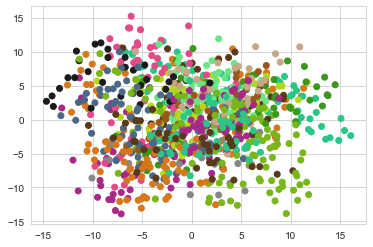

In [29]:

plt.scatter(np.array(list(pos.values()))[:,0], np.array(list(pos.values()))[:,1],c = node_color)


# Alternative to PCA: t-SNE x,y coordinates 
- below plots are using G = nx.watts_strogatz_graph(1000,10,.2), which mimick a social network
- to run the actual twitter data plot, please make sure G = "twitter Graph" above
- Please note, you need 100gb of ram to run the script below, as "nx.to_numpy_array(G)" requires around 100gb of ram

In [12]:
import networkx as nx
from sklearn.manifold import TSNE
import numpy as np

# Generate a sample graph
# G =  nx.fast_gnp_random_graph(1000, .20) 
# G = nx.watts_strogatz_graph(1000,10,.2)
# Get the adjacency matrix of the graph 
A = nx.to_numpy_array(G)

# Compute the graph Laplacian
D = np.diag(np.sum(A, axis=1))
L = D - A

# Compute the eigenvectors and eigenvalues of the Laplacian
eigvals, eigvecs = np.linalg.eig(L)

# Sort the eigenvectors by eigenvalue
eigvecs = eigvecs[:, eigvals.argsort()]

# Extract the top k eigenvectors
k = 10
X = eigvecs[:, 1:k+1]

# Initialize a t-SNE object with specified parameters
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)

# Fit the t-SNE model to the data
X_tsne = tsne.fit_transform(X)

# Get the x,y coordinates for all nodes
pos = {}
for i, node in enumerate(G.nodes()):
    pos[node] = X_tsne[i]

# Print the resulting positions
# print(pos)


# Color Coded based on DBSCAN (density based clustering), which clusters data that is close in a multi dimensional space

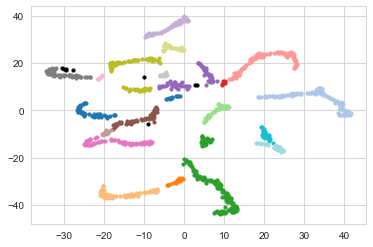

In [35]:
from sklearn.cluster import DBSCAN
# Cluster the points using DBSCAN
eps = 1.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_tsne)

# Create a color map
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # number of clusters, ignoring noise
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, num_clusters)]

# Plot the points with different colors for each cluster
for i, label in enumerate(set(labels)):
    if label == -1:
        # plot points that do not belong to any cluster in black
        plt.scatter(X_tsne[labels == label, 0], X_tsne[labels == label, 1], color='k', s=10)
    else:
        plt.scatter(X_tsne[labels == label, 0], X_tsne[labels == label, 1], color=colors[i], s=10)

# Add labels to the nodes
# pos = {}
# for i, node in enumerate(G.nodes()):
#     pos[node] = X_tsne[i]
#     plt.annotate(node, pos[node], fontsize=8)
# Show the plot
plt.show()

# Color Coded based on Louvain community detection algorithm

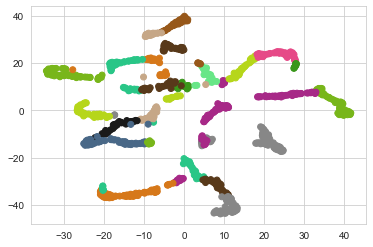

In [36]:

plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c = node_color)
plt.show()